In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
warnings.simplefilter("ignore", category=UserWarning)

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data


,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.00,3722.280000,70.275319,13.193760,0.31251,176.440,20.908880,0.0,0.44672,0.001574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,C0095,P0270,BAS,TER,U,43,F,False,76.340708,75.181897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,C0096,P0271,BAS,TER,R,67,M,False,436.828426,260.200509,...,765.53,346.252856,18.308317,3.402625,0.00777,22.004,4.918505,0.0,0.47207,0.011223
100,C0097,P0274,ICA,LAT,R,84,F,False,94.271201,100.528873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,C0098,P0286,MCA,TER,R,59,F,False,1022.481082,466.087643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



For n_clusters = 2, the average silhouette_score is 0.6854908762843417
For n_clusters = 3, the average silhouette_score is 0.5359100418596378
For n_clusters = 4, the average silhouette_score is 0.5378168421531726
For n_clusters = 5, the average silhouette_score is 0.4999442171433185
For n_clusters = 6, the average silhouette_score is 0.48000439224797964
For n_clusters = 7, the average silhouette_score is 0.31674935615509586
For n_clusters = 8, the average silhouette_score is 0.3434097174791286
For n_clusters = 9, the average silhouette_score is 0.3484512665983928
For n_clusters = 10, the average silhouette_score is 0.3310032714954656


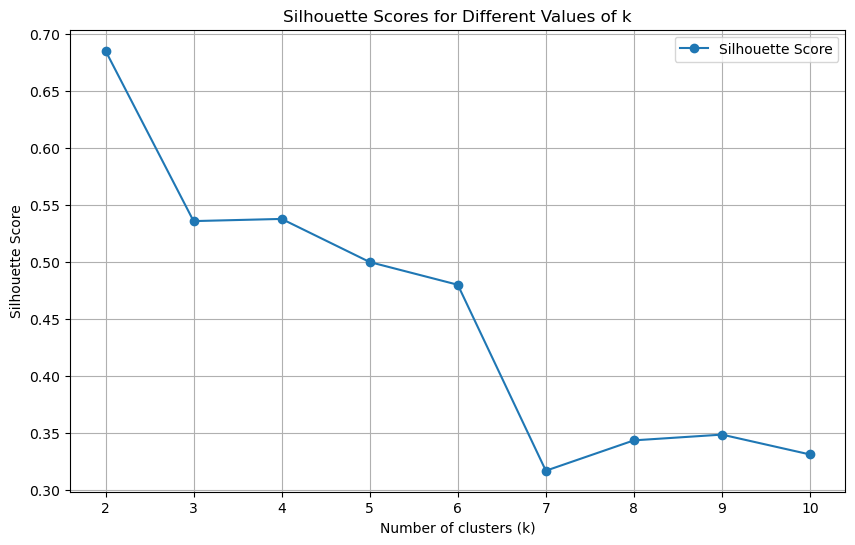

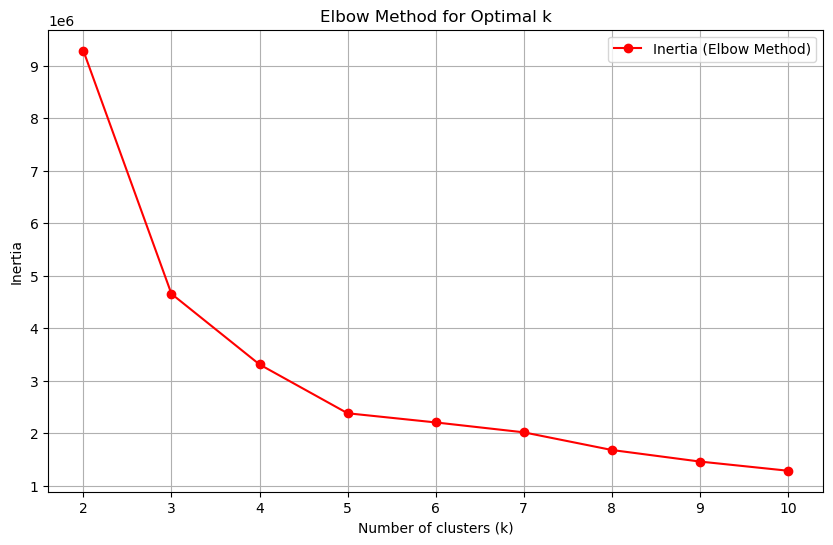

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data has been preprocessed already
# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Calculate silhouette scores and inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(kmeans.inertia_)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', label='Inertia (Elbow Method)', color='red')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


In [136]:
# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane', 'ruptureStatus']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



The average silhouette_score for k=3 is 0.5359100418596378
The Calinski-Harabasz Index for k=3 is 211.6385632326871


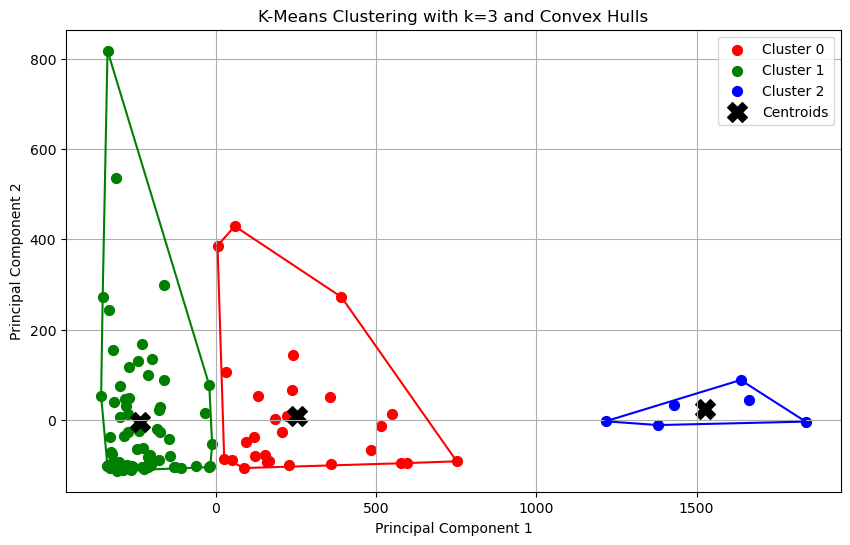

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,sex,multipleAneurysms,aneurysmLocation,aneurysmType,ruptureStatus,Cluster
0,53,125.259604,120.453515,111.237957,106.759273,21.938237,77.960221,3.5091,2.3718,2.2362,...,0.513167,3.218984,76.670529,4.719235,0,0,2,0,1,1
1,35,119.002032,122.427263,113.720361,115.774279,18.493788,69.250741,4.3838,2.1032,1.7931,...,0.532819,5.330711,116.839304,15.753911,0,0,2,0,1,1
2,43,12.740609,23.480617,11.865511,21.853480,6.142748,8.726193,1.4895,1.2775,1.0948,...,0.299136,3.393943,123.657085,9.378066,0,0,2,1,1,1
3,60,9.376307,18.084625,9.031234,17.295395,4.905063,6.185859,1.5687,1.0935,0.8609,...,0.296743,5.385147,129.829251,27.053597,0,1,2,1,1,1
4,26,37.934454,54.844592,35.903048,52.303479,9.729065,25.165788,2.5156,1.6261,1.4687,...,0.355401,8.852139,117.065812,23.284114,0,0,2,0,0,1


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Assuming data has been preprocessed already
# Perform K-Means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the data for further analysis
data['Cluster'] = cluster_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data.drop('Cluster', axis=1), cluster_labels)
print(f"The average silhouette_score for k={k} is {silhouette_avg}")

# Calculate Calinski-Harabasz Index (CSI)
csi = calinski_harabasz_score(data.drop('Cluster', axis=1), cluster_labels)
print(f"The Calinski-Harabasz Index for k={k} is {csi}")

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.drop('Cluster', axis=1))

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Get the centroids in the reduced PCA space
centroids = pca.transform(kmeans.cluster_centers_)

# Visualize the clusters with centroids and convex hulls
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for cluster in range(k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=50, color=colors[cluster])
    
    # Compute the convex hull for each cluster
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data[['PC1', 'PC2']])
        for simplex in hull.simplices:
            plt.plot(cluster_data.iloc[simplex, 0], cluster_data.iloc[simplex, 1], color=colors[cluster], linestyle='-', linewidth=1.5)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title(f'K-Means Clustering with k={k} and Convex Hulls')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Display the first few rows of the data with the cluster labels
data.head()


In [138]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Calculate metrics in original data space for K-Means
kmeans_silhouette = silhouette_score(data, kmeans_labels)
kmeans_ch = calinski_harabasz_score(data, kmeans_labels)
kmeans_db = davies_bouldin_score(data, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Calinski-Harabasz Index: {kmeans_ch:.3f}")
print(f"K-Means Davies-Bouldin Score: {kmeans_db:.3f}")

K-Means Silhouette Score: 0.536
K-Means Calinski-Harabasz Index: 211.639
K-Means Davies-Bouldin Score: 0.638


The average silhouette_score for k=3 is 0.5359100418596378
The Calinski-Harabasz Index for k=3 is 211.6385632326871
K-Means Davies-Bouldin Score: 0.638


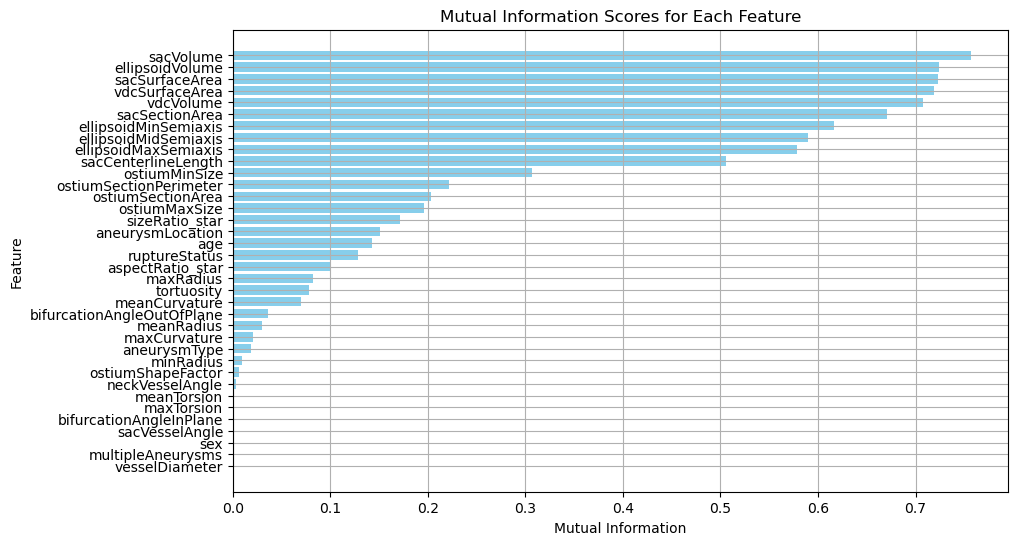

,Feature,Mutual Information
1,sacVolume,0.756906
6,ellipsoidVolume,0.724470
2,sacSurfaceArea,0.723318
4,vdcSurfaceArea,0.718952
3,vdcVolume,0.707567
5,sacSectionArea,0.671014
9,ellipsoidMinSemiaxis,0.616881
8,ellipsoidMidSemiaxis,0.589543
7,ellipsoidMaxSemiaxis,0.578441
10,sacCenterlineLength,0.505333


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif

# Assuming data has been preprocessed already
# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the data for further analysis
data['Cluster'] = cluster_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data.drop('Cluster', axis=1), cluster_labels)
print(f"The average silhouette_score for k={k} is {silhouette_avg}")

# Calculate Calinski-Harabasz Index (CSI)
csi = calinski_harabasz_score(data.drop('Cluster', axis=1), cluster_labels)
print(f"The Calinski-Harabasz Index for k={k} is {csi}")

# davies_bouldin_score
kmeans_db = davies_bouldin_score(data, kmeans_labels)
print(f"K-Means Davies-Bouldin Score: {kmeans_db:.3f}")

# Calculate Mutual Information between each feature and the cluster labels
mi_scores = mutual_info_classif(data.drop('Cluster', axis=1), data['Cluster'])

# Create a DataFrame for easier visualization
mi_df = pd.DataFrame({'Feature': data.columns[:-1], 'Mutual Information': mi_scores})

# Sort the DataFrame by MI scores in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the Mutual Information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.title('Mutual Information Scores for Each Feature')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the highest MI score at the top
plt.grid(True)
plt.show()

# Display the Mutual Information scores
mi_df


In [140]:
data.columns

Index(['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea',
       'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis',
       'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength',
       'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize',
       'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star',
       'sizeRatio_star', 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle',
       'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius',
       'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane',
       'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms',
       'aneurysmLocation', 'aneurysmType', 'ruptureStatus', 'Cluster'],
      dtype='object')

C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: 

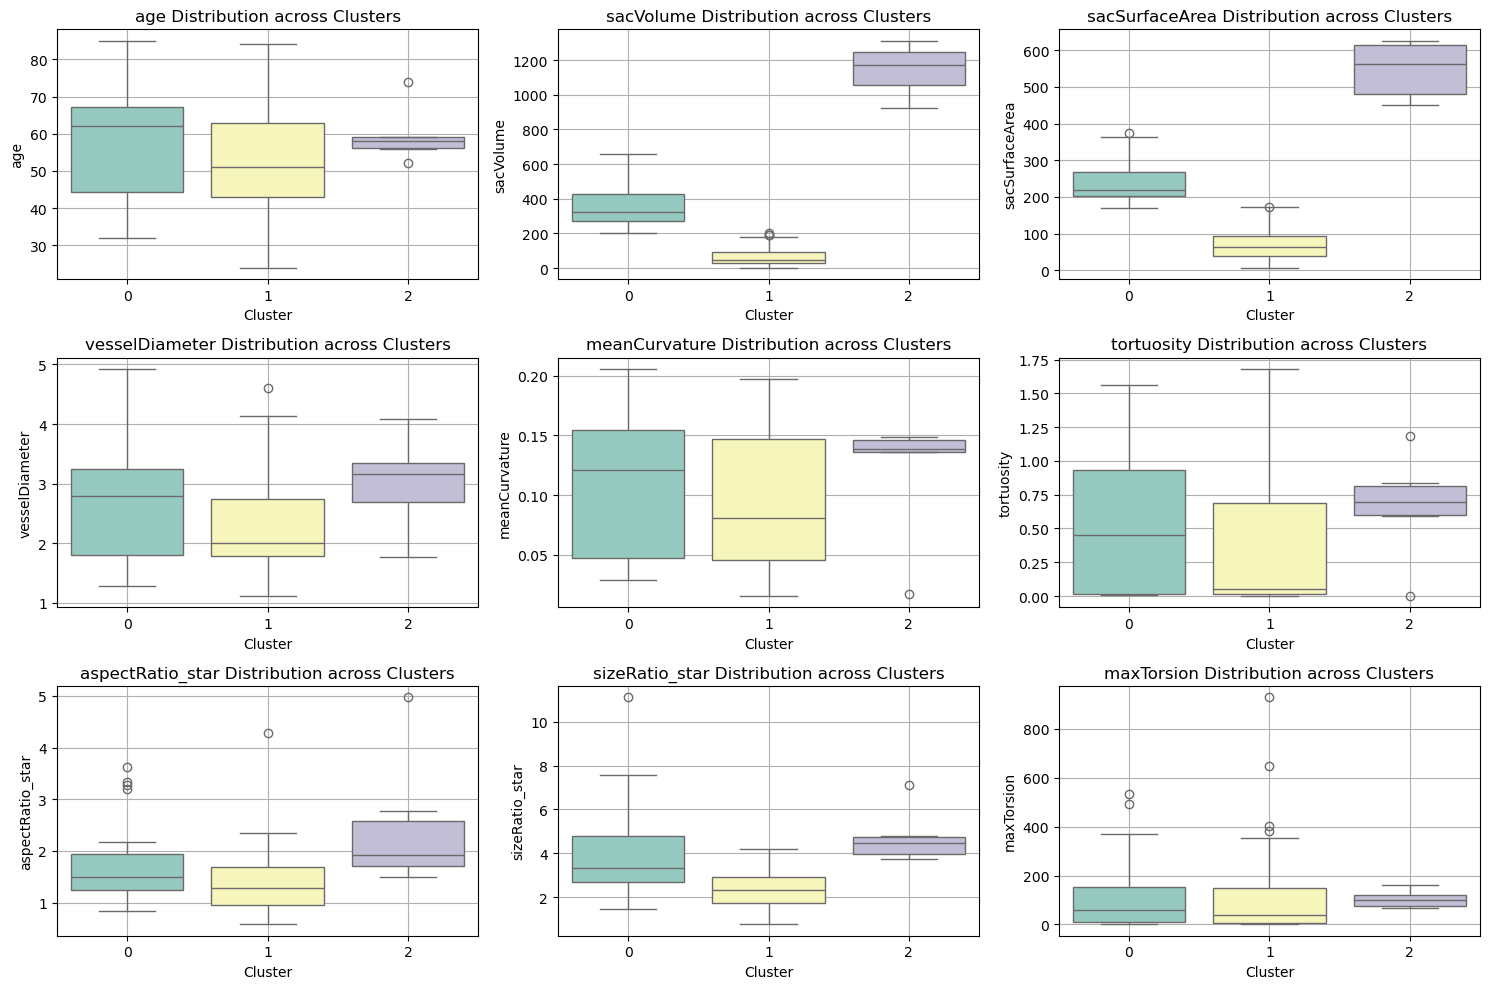

Chi-square test for sex across clusters: p-value = 0.4735391125051105
Chi-square test for multipleAneurysms across clusters: p-value = 0.932618935337348
Chi-square test for aneurysmLocation across clusters: p-value = 0.10177242862508443
Chi-square test for aneurysmType across clusters: p-value = 0.0017811160932179639
Chi-square test for ruptureStatus across clusters: p-value = 0.3368236474426493
ANOVA test for age across clusters: p-value = 0.11010177071642595
ANOVA test for sacVolume across clusters: p-value = 1.4203609664987462e-54
ANOVA test for sacSurfaceArea across clusters: p-value = 1.3790334239159353e-46
ANOVA test for vesselDiameter across clusters: p-value = 0.011968107051645088
ANOVA test for meanCurvature across clusters: p-value = 0.23137110480348924
ANOVA test for tortuosity across clusters: p-value = 0.08916191484004603
ANOVA test for aspectRatio_star across clusters: p-value = 0.0005690283651211096
ANOVA test for sizeRatio_star across clusters: p-value = 2.3599604777577

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, f_oneway

# Updated list of categorical and numerical variables
categorical_vars = ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']
numerical_vars = ['age', 'sacVolume', 'sacSurfaceArea', 'vesselDiameter', 'meanCurvature', 'tortuosity', 
                  'aspectRatio_star', 'sizeRatio_star', 'maxTorsion']



# Visualize numerical variables across clusters using boxplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
    plt.title(f'{var} Distribution across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Statistical Testing (if needed)

# Chi-square test for categorical variables
for var in categorical_vars:
    contingency_table = pd.crosstab(data['Cluster'], data[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {var} across clusters: p-value = {p}")

# ANOVA test for numerical variables
for var in numerical_vars:
    groups = [data[data['Cluster'] == cluster][var] for cluster in range(k)]
    f_stat, p = f_oneway(*groups)
    print(f"ANOVA test for {var} across clusters: p-value = {p}")


In [142]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the CSV file into a Pandas DataFrame
file_path = "Merged_Aneurysm.csv"
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Store mappings before converting categorical variables to numeric
label_mappings = {}
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category')
    label_mappings[col] = dict(enumerate(data[col].cat.categories))
    data[col] = data[col].cat.codes

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane', 'ruptureStatus']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Add cluster labels to the data for further analysis
data['Cluster'] = cluster_labels

# Reverse map the numerical codes back to original labels using stored mappings
for col, mapping in label_mappings.items():
    data[col] = data[col].map(mapping)

# Function to calculate the distribution of categorical variables within clusters and add p-values
def calculate_cluster_distribution_with_pvalues(data, categorical_vars):
    cluster_summary = {}

    for var in categorical_vars:
        # Cross-tabulate to get counts
        crosstab = pd.crosstab(data[var], data['Cluster'])
        
        # Perform the Chi-square test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        
        # Add the p-value as an additional column to the crosstab
        crosstab['p-value'] = p
        
        # Append the result
        cluster_summary[var] = crosstab

    return cluster_summary

# Updated list of categorical variables
categorical_vars = ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Calculate the distribution within clusters and add p-values
cluster_distribution = calculate_cluster_distribution_with_pvalues(data, categorical_vars)

# Combine the individual distributions into a single DataFrame for display
cluster_distribution_df = pd.concat(cluster_distribution, axis=0)

# Rename the index to reflect original variable names
cluster_distribution_df.index.names = ['Category', 'Subcategory']

# Display the table with p-values
cluster_distribution_df


Cluster                         0   1  2   p-value
Category          Subcategory                     
sex               F            16  44  5  0.473539
                  M            12  25  1  0.473539
multipleAneurysms False        24  57  5  0.932619
                  True          4  12  1  0.932619
aneurysmLocation  ACA           9  15  0  0.101772
                  BAS           1   6  0  0.101772
                  ICA          15  26  5  0.101772
                  MCA           3  22  1  0.101772
aneurysmType      LAT          16  19  5  0.001781
                  TER          12  50  1  0.001781
ruptureStatus     R            11  32  1  0.336824
                  U            17  37  5  0.336824

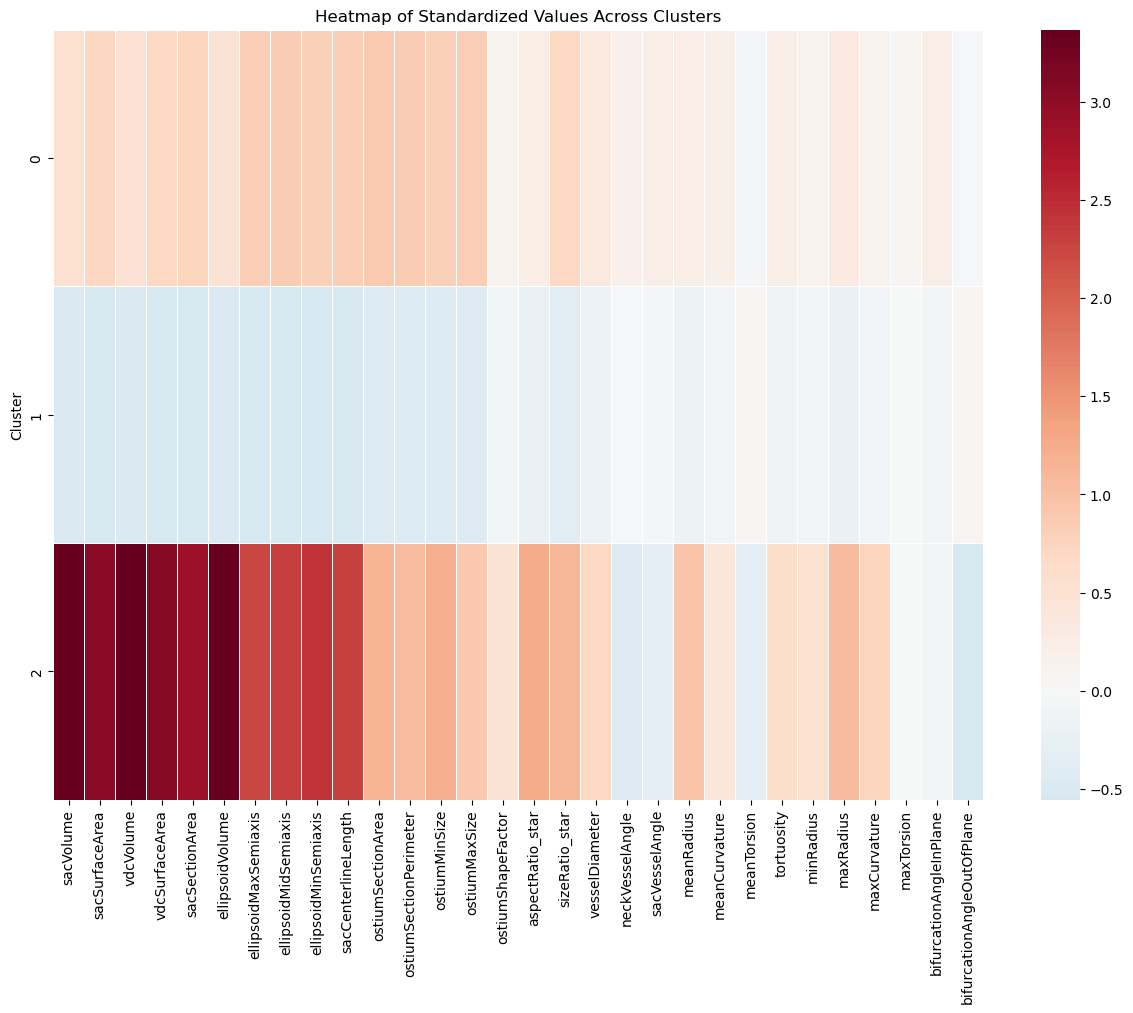

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded and preprocessed

# Define the list of numerical variables to be used
numerical_vars = ['sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                 'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                 'bifurcationAngleOutOfPlane']

# Standardize the numerical variables
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Add the cluster labels back to the standardized data
data_scaled['Cluster'] = data['Cluster']

# Aggregate by cluster and calculate the mean of standardized values
cluster_means = data_scaled.groupby('Cluster').mean()

# Plot the heatmap with a wider color spectrum
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, cmap='RdBu_r', annot=False, linewidths=.5, center=0, robust=True)
plt.title('Heatmap of Standardized Values Across Clusters')
plt.show()



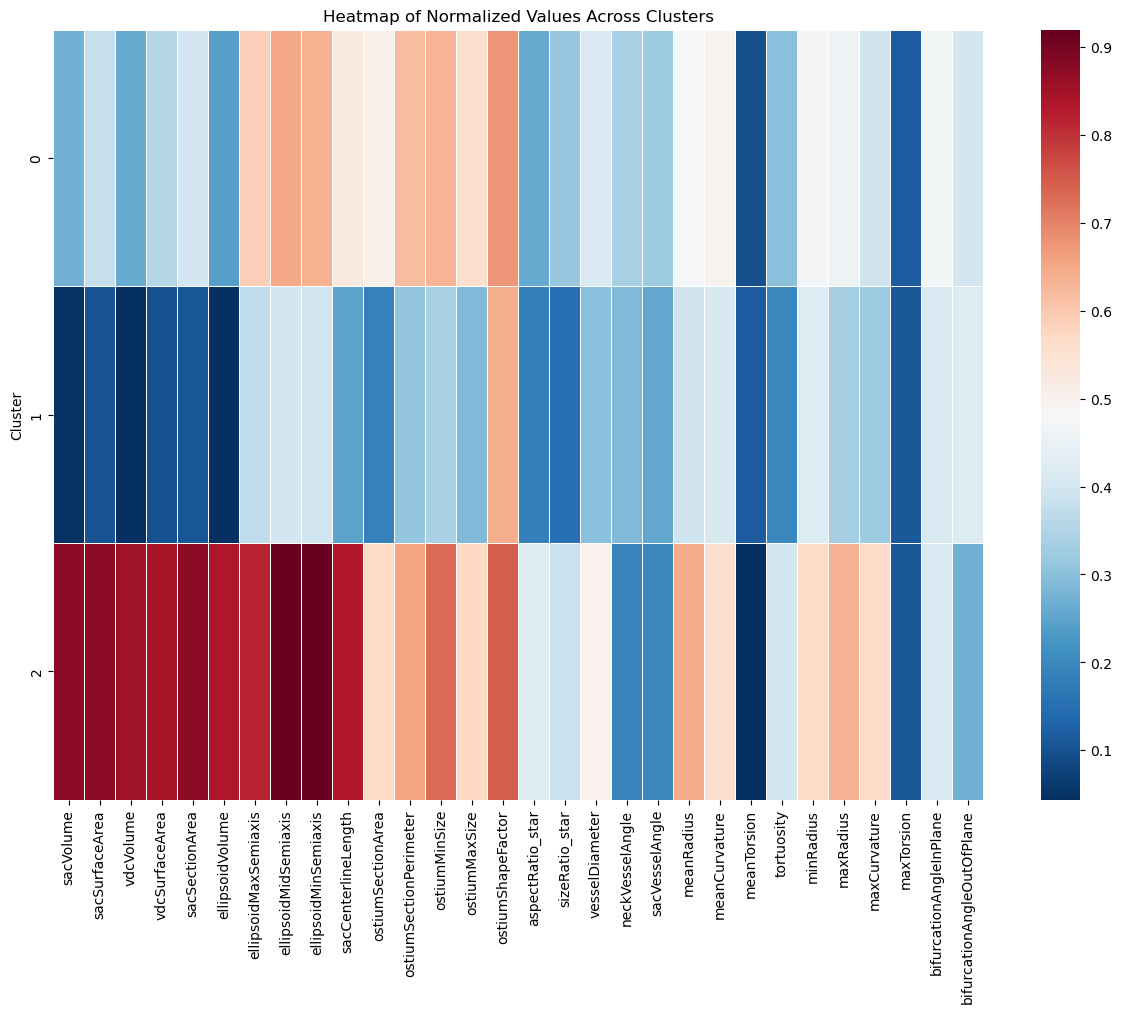

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming data is already loaded and preprocessed

# Define the list of numerical variables to be used
numerical_vars = ['sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                 'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                 'bifurcationAngleOutOfPlane']

# Normalize the numerical variables
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_vars]), columns=numerical_vars)

# Add the cluster labels back to the normalized data
data_normalized['Cluster'] = data['Cluster']

# Aggregate by cluster and calculate the mean of normalized values
cluster_means = data_normalized.groupby('Cluster').mean()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, cmap='RdBu_r', annot=False, linewidths=.5)
plt.title('Heatmap of Normalized Values Across Clusters')
plt.show()


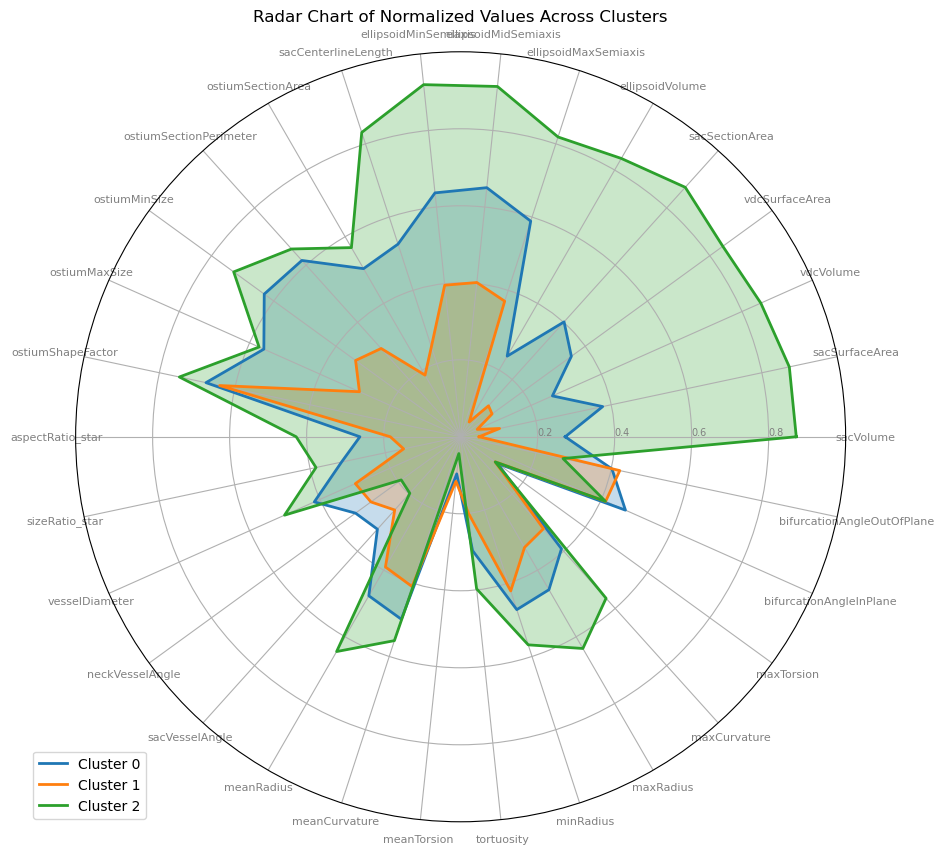

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming data_normalized or data_standardized is already available
# For this example, I'll use the normalized data

# Aggregate by cluster and calculate the mean of normalized values
cluster_means = data_normalized.groupby('Cluster').mean()

# Number of variables we're plotting (number of features)
categories = cluster_means.columns
N = len(categories)

# What will be the angle of each axis in the plot (in radians)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw y-labels (can be omitted if not needed)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0, 1)

# Plot each cluster
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.title('Radar Chart of Normalized Values Across Clusters')
plt.show()


The average silhouette_score for k=3 is 0.3115697048877252
The Calinski-Harabasz Index for k=3 is 52.58242451156145


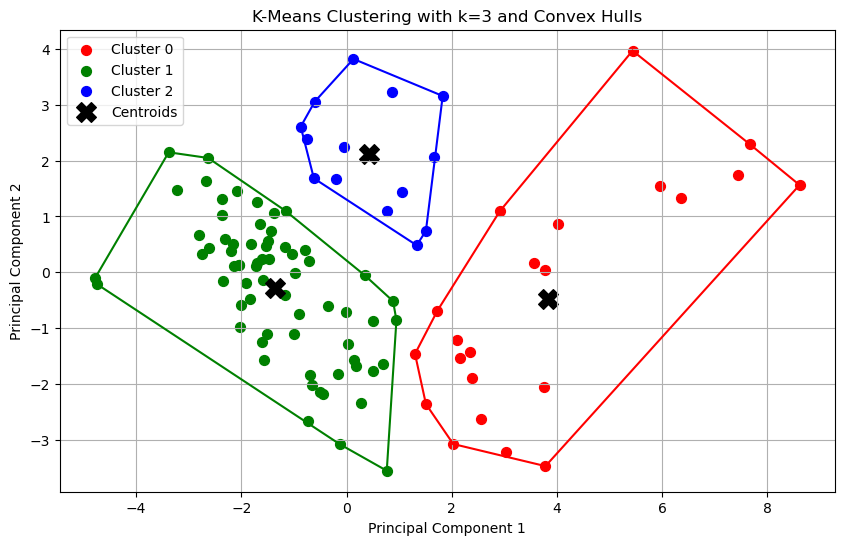

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,sex,multipleAneurysms,aneurysmLocation,aneurysmType,ruptureStatus,Cluster
0,53,125.259604,120.453515,111.237957,106.759273,21.938237,77.960221,3.5091,2.3718,2.2362,...,0.513167,3.218984,76.670529,4.719235,F,False,ICA,LAT,U,1
1,35,119.002032,122.427263,113.720361,115.774279,18.493788,69.250741,4.3838,2.1032,1.7931,...,0.532819,5.330711,116.839304,15.753911,F,False,ICA,LAT,U,1
2,43,12.740609,23.480617,11.865511,21.853480,6.142748,8.726193,1.4895,1.2775,1.0948,...,0.299136,3.393943,123.657085,9.378066,F,False,ICA,TER,U,1
3,60,9.376307,18.084625,9.031234,17.295395,4.905063,6.185859,1.5687,1.0935,0.8609,...,0.296743,5.385147,129.829251,27.053597,F,True,ICA,TER,U,1
4,26,37.934454,54.844592,35.903048,52.303479,9.729065,25.165788,2.5156,1.6261,1.4687,...,0.355401,8.852139,117.065812,23.284114,F,False,ICA,LAT,R,1


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Assuming data has been preprocessed and includes the significant features

# Select significant features
significant_features = [
    'sacVolume', 'vdcVolume', 'ellipsoidVolume', 
    'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 
    'ellipsoidMinSemiaxis', 'vesselDiameter', 
    'meanRadius', 'minRadius', 'maxRadius'
]

# Subset the data to only include these features
data_subset = data[significant_features]

# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Perform K-Means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data for further analysis
data['Cluster'] = cluster_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"The average silhouette_score for k={k} is {silhouette_avg}")

# Calculate Calinski-Harabasz Index (CHI)
csi = calinski_harabasz_score(data_scaled, cluster_labels)
print(f"The Calinski-Harabasz Index for k={k} is {csi}")

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Get the centroids in the reduced PCA space
centroids = pca.transform(kmeans.cluster_centers_)

# Visualize the clusters with centroids and convex hulls
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for cluster in range(k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=50, color=colors[cluster])
    
    # Compute the convex hull for each cluster
    if len(cluster_data) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_data[['PC1', 'PC2']])
        for simplex in hull.simplices:
            plt.plot(cluster_data.iloc[simplex, 0], cluster_data.iloc[simplex, 1], color=colors[cluster], linestyle='-', linewidth=1.5)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title(f'K-Means Clustering with k={k} and Convex Hulls')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Display the first few rows of the data with the cluster labels
data.head()


C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
C:\Users\shrin\AppData\Local\Temp\ipykernel_328388\71429860.py:23: 

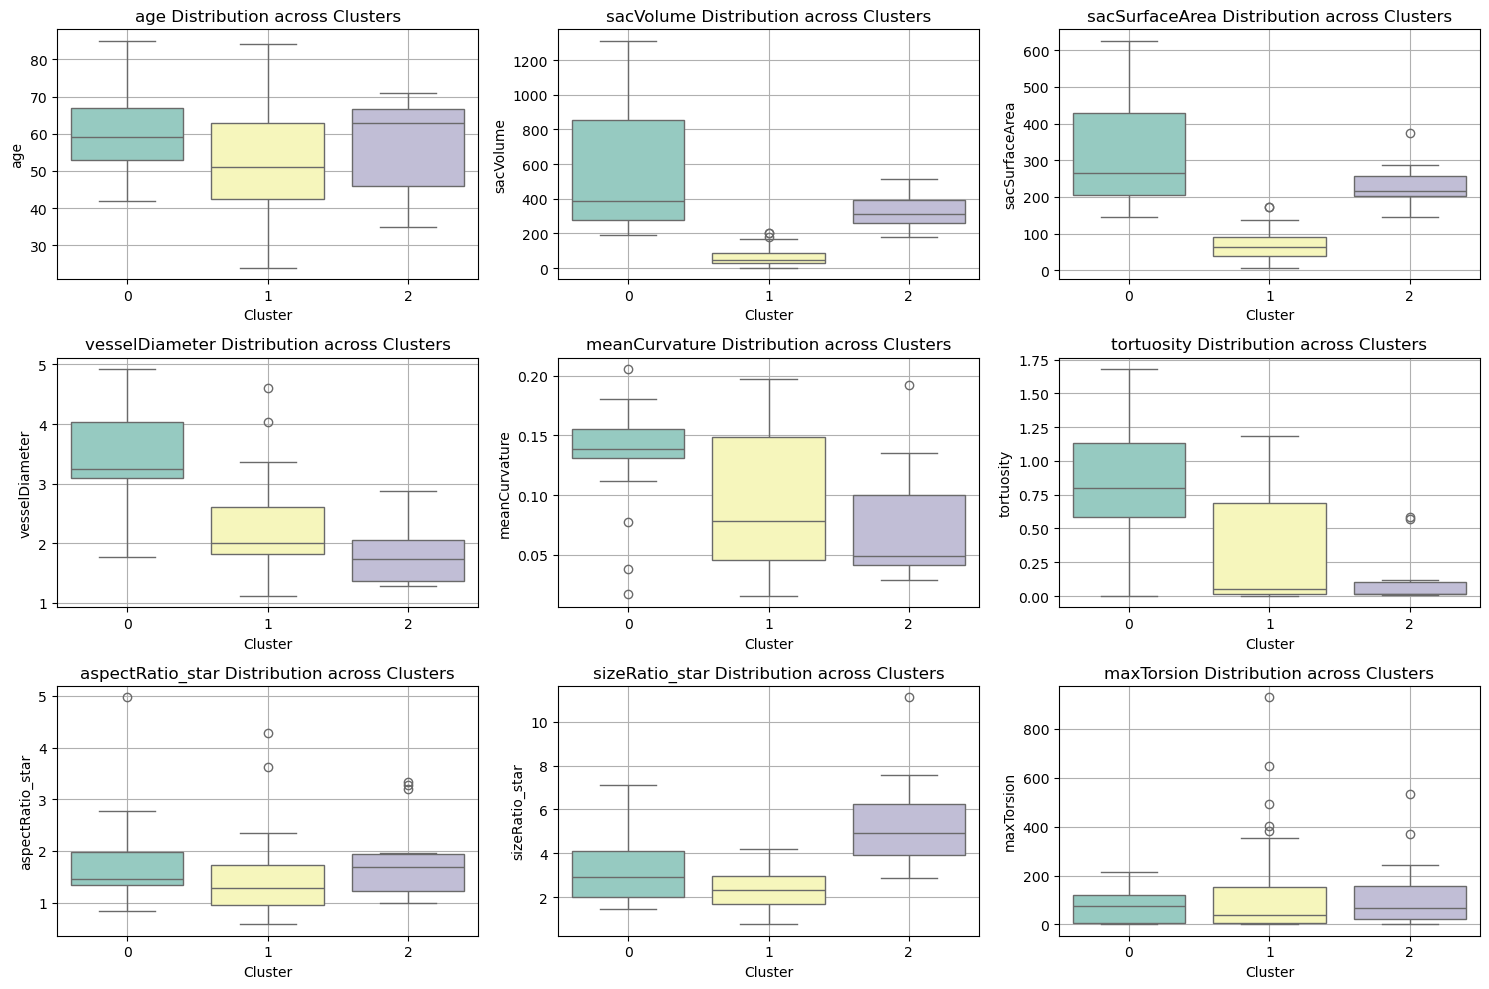

Chi-square test for sex across clusters: p-value = 0.009767305659596381
Chi-square test for multipleAneurysms across clusters: p-value = 0.8704705750696786
Chi-square test for aneurysmLocation across clusters: p-value = 1.145197478260062e-06
Chi-square test for aneurysmType across clusters: p-value = 1.0308347942482748e-06
Chi-square test for ruptureStatus across clusters: p-value = 0.004166078134663136
ANOVA test for age across clusters: p-value = 0.0782876026789536
ANOVA test for sacVolume across clusters: p-value = 1.8037801395424965e-19
ANOVA test for sacSurfaceArea across clusters: p-value = 4.0895407097118705e-23
ANOVA test for vesselDiameter across clusters: p-value = 2.1749454642247346e-11
ANOVA test for meanCurvature across clusters: p-value = 0.0014653384415272835
ANOVA test for tortuosity across clusters: p-value = 4.784840826590587e-07
ANOVA test for aspectRatio_star across clusters: p-value = 0.043458160848821314
ANOVA test for sizeRatio_star across clusters: p-value = 2.3

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, f_oneway

# Updated list of categorical and numerical variables
categorical_vars = ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']
numerical_vars = ['age', 'sacVolume', 'sacSurfaceArea', 'vesselDiameter', 'meanCurvature', 'tortuosity', 
                  'aspectRatio_star', 'sizeRatio_star', 'maxTorsion']



# Visualize numerical variables across clusters using boxplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x='Cluster', y=var, palette='Set3')
    plt.title(f'{var} Distribution across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Statistical Testing (if needed)

# Chi-square test for categorical variables
for var in categorical_vars:
    contingency_table = pd.crosstab(data['Cluster'], data[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {var} across clusters: p-value = {p}")

# ANOVA test for numerical variables
for var in numerical_vars:
    groups = [data[data['Cluster'] == cluster][var] for cluster in range(k)]
    f_stat, p = f_oneway(*groups)
    print(f"ANOVA test for {var} across clusters: p-value = {p}")
